# Exercise 2.1 Dendrograms & Principal Components Analysis

### Contents:

#### 01. Importing and Libraries and Data
#### 02. Preprocessing: Data Wrangling and Scaling
#### 03. Creating Dendrograms
#### 04. Prinicpal Component Analysis

## 01. Importing Libraries and Data

In [5]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [6]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [7]:
# Set option to display max number of columns

pd.set_option('display.max_columns', None)

In [8]:
# Define path for importing the data

path = r'C:\Users\jenci\Documents\Data Analytics\Data Analytics\Machine Learning\Achievement 2\Achievment Project'

In [9]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))

In [10]:
pleasant = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [11]:
# Check data

df.head(1)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.0,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,7.7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,5.4,0.83,1.0161,0.12,0.08,0,0.0,10.0,7.0,11.5,8,0.91,0.0,0,0.8,-0.3,1.6,7,0.91,1.001,0.13,0.22,0,0.0,10.6,9.4,8.3,2.9,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.4,1.0,1.0173,0.2,0.0,0.0,-0.6,-1.9,0.5,7,8.7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.0,0.92,1.026,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.2,0.1,0,0.0,6.9,1.1,10.4,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,3,2.6,0.73,1.0152,7.1,7.8,4,4.5,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,3.8,0.76,1.0169,1.54,0.44,10.0,7.8,12.2,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9


In [12]:
pleasant.head(1)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# Check shape

df.shape

(22950, 170)

In [14]:
# Check shape

pleasant.shape

(22950, 16)

## 02. Preprocessing: Data Wrangling and Scaling

**Data Wrangling**

In [16]:
# Display all rows for the missing values check
pd.set_option('display.max_rows', None)

# Check for missing values
df.isnull().sum()

DATE                           0
MONTH                          0
BASEL_cloud_cover              0
BASEL_wind_speed               0
BASEL_humidity                 0
BASEL_pressure                 0
BASEL_global_radiation         0
BASEL_precipitation            0
BASEL_snow_depth               0
BASEL_sunshine                 0
BASEL_temp_mean                0
BASEL_temp_min                 0
BASEL_temp_max                 0
BELGRADE_cloud_cover           0
BELGRADE_humidity              0
BELGRADE_pressure              0
BELGRADE_global_radiation      0
BELGRADE_precipitation         0
BELGRADE_sunshine              0
BELGRADE_temp_mean             0
BELGRADE_temp_min              0
BELGRADE_temp_max              0
BUDAPEST_cloud_cover           0
BUDAPEST_humidity              0
BUDAPEST_pressure              0
BUDAPEST_global_radiation      0
BUDAPEST_precipitation         0
BUDAPEST_sunshine              0
BUDAPEST_temp_mean             0
BUDAPEST_temp_min              0
BUDAPEST_t

In [17]:
# Reset the display option to default (optional)

pd.reset_option('display.max_rows')

In [18]:
# Drop 3 weather stations from dataframe - not enough pertinent data

# Create list of columns to drop
columns_to_drop = ['TOURS', 'GDANSK', 'ROMA']
cols_to_drop = [col for col in df.columns if any(substring in col for substring in columns_to_drop)]

# Drop the columns
df_1 = df.drop(columns=cols_to_drop)

In [19]:
# Filter Dataset to 2010s

df_2010 = df_1[df_1['DATE'].astype(str).str.startswith('2010')] 
df_2010.head(1)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,2.3,0.93,0.9965,0.18,0.56,0,0.0,2.9,-0.2,4.8,6,0.85,0.9912,0.64,2.63,3.2,9.9,8.4,13.4,6,0.67,1.017,0.31,0.0,0.7,5.0,3.6,7.8,4,3.8,0.78,1.0026,0.37,0.0,4.2,-1.6,-6.3,0.7,8,3.9,0.89,0.9997,0.12,0.02,0,0.0,-1.1,-2.8,-0.6,2,0.77,1.0056,0.49,0.0,0,6.4,1.6,-0.5,5.0,3.1,0.93,0.9981,0.12,0.2,0.0,-2.6,-3.0,-1.8,8,1.0,0.97,0.9926,0.12,0.46,0.0,6.9,5.5,7.7,7,4.6,0.91,1.0008,0.12,0.01,0.0,-2.0,-6.1,-1.1,5,4.4,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,7,0.91,0.2,0.43,0,0.0,3.1,0.1,4.9,7,6.0,0.76,1.011,0.04,0.24,33,0.0,-7.7,-8.9,-4.9,4,7.5,0.89,1.0054,0.66,0.56,5.6,-9.7,-11.5,-7.9,6,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0,1,0.8,1.0121,0.43,0.0,0,6.0,1.7,-1.6,5.0


In [20]:
# Dynamic selection of columns that end with '_temp_mean'

temp_columns = [col for col in df_2010.columns if col.endswith('_temp_mean')]

In [21]:
# Create a new dataframe with the selected columns

df_1 = df_2010[temp_columns].copy()

In [22]:
# Check output

df_1.head(5)

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
18263,2.9,9.9,5.0,-1.6,-1.1,1.6,-2.6,6.9,-2.0,5.6,3.1,-7.7,-9.7,-7.6,1.7
18264,-1.5,3.5,1.6,-1.1,-1.5,1.3,-3.7,2.5,-2.1,5.0,-2.5,-11.0,-17.0,-8.9,0.8
18265,-3.2,-0.6,-1.9,-3.9,-3.1,1.2,-3.3,-0.5,-3.9,5.8,-3.6,-12.4,-21.6,-9.4,0.5
18266,-4.9,0.0,-4.1,-2.9,-4.1,-2.5,-6.5,-3.3,-5.4,7.8,-4.9,-9.5,-18.6,-6.1,3.7
18267,-4.0,1.2,-3.5,-0.7,-2.7,-1.9,-9.1,-1.5,-2.3,8.0,-6.7,-12.4,-14.7,-14.7,2.3


In [23]:
#Check shape

df_1.shape

(365, 15)

**Scaling the Data**

In [24]:
# Create scaler object using StandardScaler from sklearn.preprocessing

scaler = StandardScaler()

In [25]:
# Create new dataframe with scaled data

df_sc = pd.DataFrame(scaler.fit_transform(df_1), columns=df_1.columns)
df_sc.head()

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,-0.877406,-0.354836,-0.711396,-1.461102,-1.350410,-1.337554,-1.271774,-0.440366,-1.438052,-1.117149,-0.690172,-1.272094,-0.573563,-1.373696,-2.789164
1,-1.424933,-1.060642,-1.088775,-1.393229,-1.400831,-1.381962,-1.402354,-0.947813,-1.450781,-1.190423,-1.359867,-1.605240,-1.542471,-1.504750,-3.112718
2,-1.636477,-1.512798,-1.477254,-1.773316,-1.602514,-1.396764,-1.354870,-1.293799,-1.679901,-1.092724,-1.491414,-1.746574,-2.153015,-1.555155,-3.220569
3,-1.848022,-1.446629,-1.721441,-1.637571,-1.728565,-1.944463,-1.734737,-1.616720,-1.870835,-0.848477,-1.646879,-1.453810,-1.754834,-1.222481,-2.070155
4,-1.736027,-1.314291,-1.654845,-1.338931,-1.552093,-1.855647,-2.043380,-1.409128,-1.476239,-0.824052,-1.862138,-1.746574,-1.237198,-2.089448,-2.573461


## 03. Creating Dendrograms

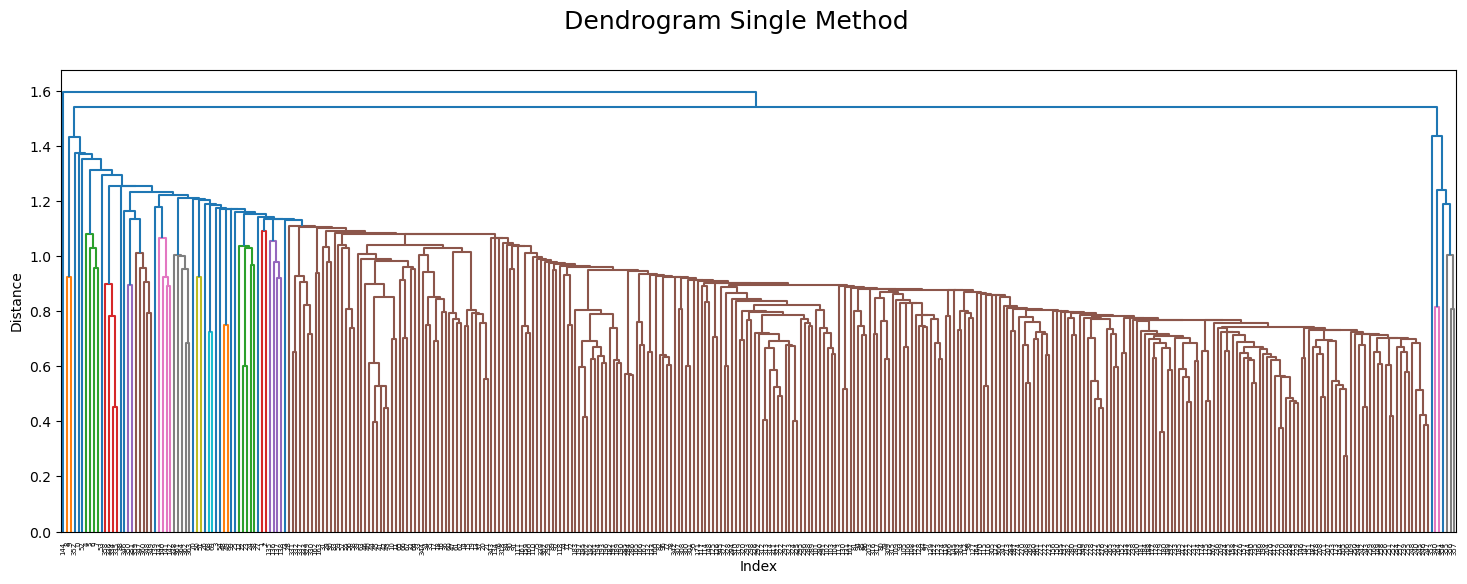

In [26]:
# Create dendrogram (single method) 
distance_single = linkage(df_sc, method="single")

plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

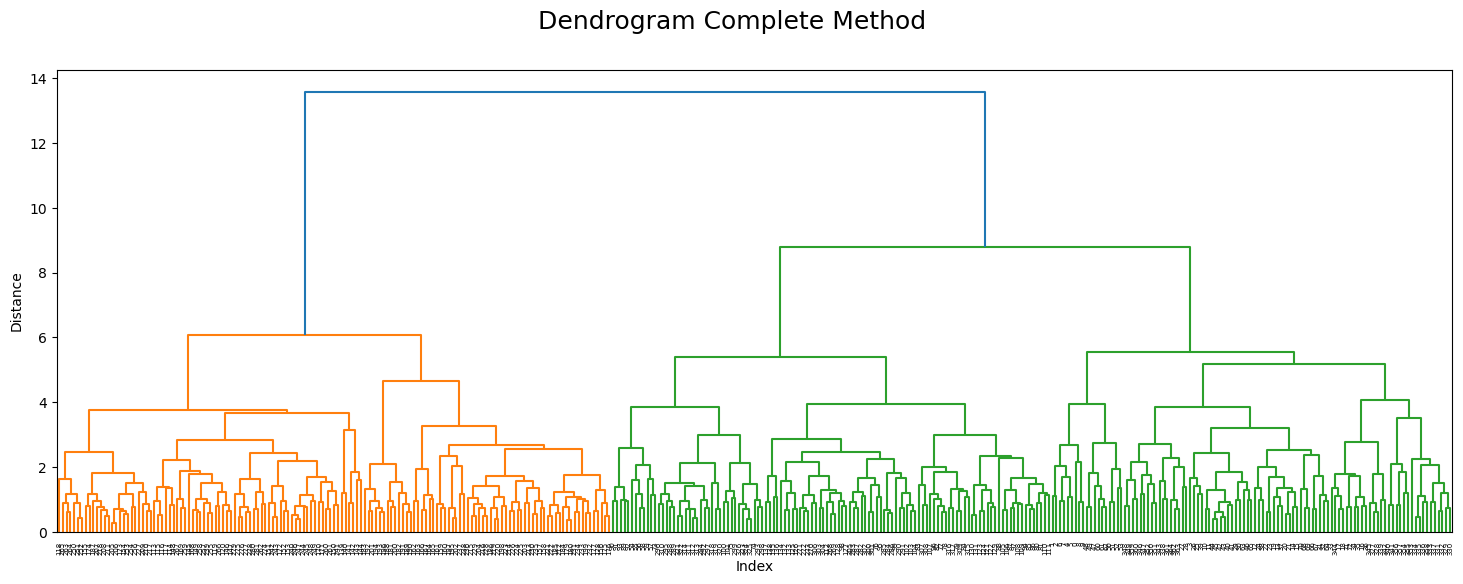

In [27]:
# Create dendrogram (complete method)
distance_complete = linkage(df_sc, method="complete")

plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

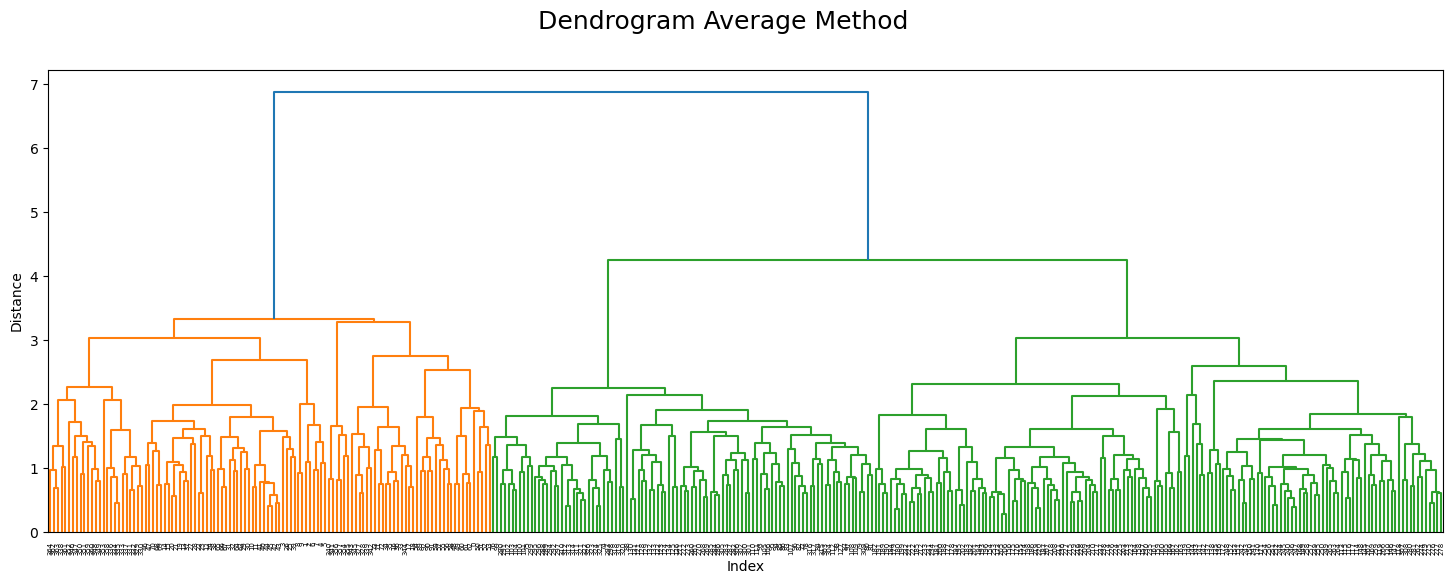

In [28]:
# Create dendrogram (average method)
distance_average = linkage(df_sc, method="average")

plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

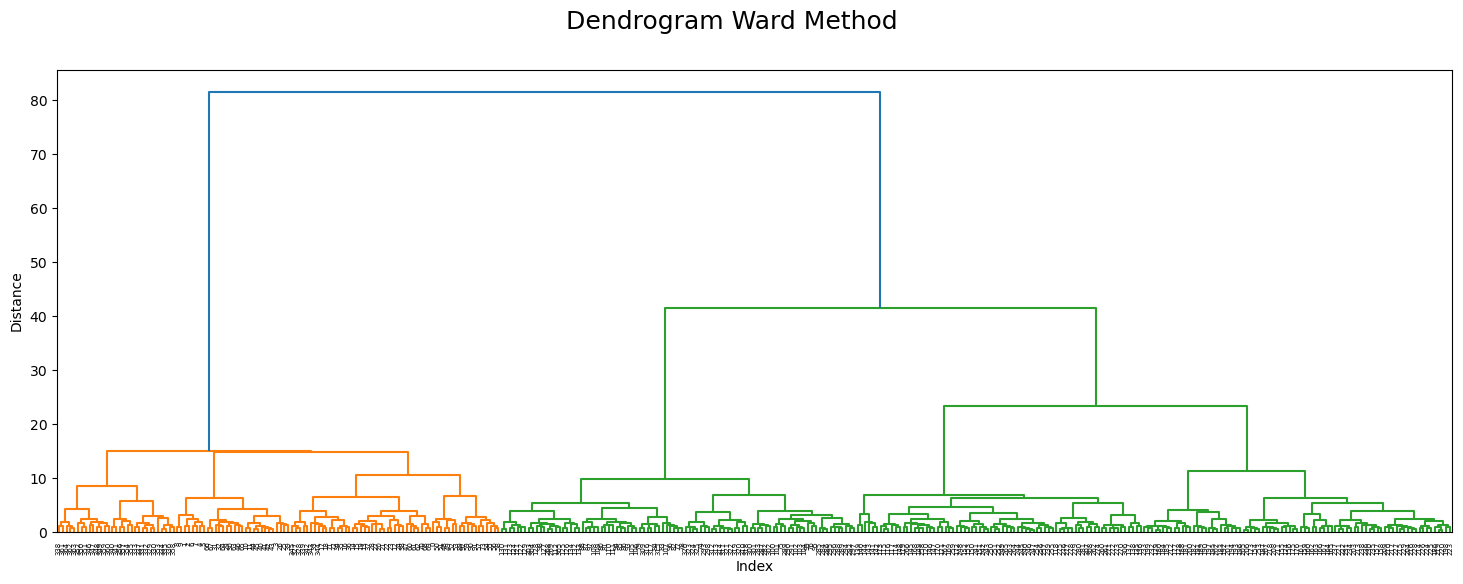

In [29]:
# Create dendrogram (ward method)
distance_ward = linkage(df_sc, method="ward")

plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

## 04. Principal Component Analysis

In [31]:
# Create subset

df_2 = df_2010.drop(['DATE','MONTH'], axis=1)

In [33]:
# Check output

df_2.head(5)

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,8,2.3,0.93,0.9965,0.18,0.56,0,0.0,2.9,-0.2,4.8,6,0.85,0.9912,0.64,2.63,3.2,9.9,8.4,13.4,6,0.67,1.017,0.31,0.00,0.7,5.0,3.6,7.8,4,3.8,0.78,1.0026,0.37,0.00,4.2,-1.6,-6.3,0.7,8,3.9,0.89,0.9997,0.12,0.02,0,0.0,-1.1,-2.8,-0.6,2,0.77,1.0056,0.49,0.00,0,6.4,1.6,-0.5,5.0,3.1,0.93,0.9981,0.12,0.20,0.0,-2.6,-3.0,-1.8,8,1.0,0.97,0.9926,0.12,0.46,0.0,6.9,5.5,7.7,7,4.6,0.91,1.0008,0.12,0.01,0.0,-2.0,-6.1,-1.1,5,4.4,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,7,0.91,0.20,0.43,0,0.0,3.1,0.1,4.9,7,6.0,0.76,1.0110,0.04,0.24,33,0.0,-7.7,-8.9,-4.9,4,7.5,0.89,1.0054,0.66,0.56,5.6,-9.7,-11.5,-7.9,6,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0,1,0.80,1.0121,0.43,0.00,0,6.0,1.7,-1.6,5.0
18264,3,3.0,0.74,1.0193,0.58,0.00,1,5.2,-1.5,-4.2,0.4,8,0.92,0.9995,0.25,0.74,0.0,3.5,0.7,8.4,7,0.67,1.017,0.38,0.01,1.4,1.6,0.1,5.8,8,3.1,0.91,1.0140,0.14,0.01,0.0,-1.1,-6.4,1.2,7,3.6,0.88,1.0152,0.26,0.45,1,1.6,-1.5,-5.8,0.6,4,0.82,1.0155,0.48,0.00,0,5.9,1.3,-2.4,3.0,2.6,0.87,1.0146,0.31,0.10,2.0,-3.7,-4.8,-2.5,8,1.3,0.94,1.0066,0.20,0.79,0.0,2.5,0.7,6.7,7,4.9,0.90,1.0161,0.30,0.02,2.7,-2.1,-6.7,0.2,7,1.1,0.81,1.0205,0.42,0.00,0.3,5.0,2.6,7.5,6,0.86,0.31,0.07,4,0.6

In [35]:
# Create scaler object using StandardScaler from sklearn.preprocessing

scaler_1 = StandardScaler()

In [36]:
# Create new dataframe with scaled data

df_sc_1 = pd.DataFrame(scaler_1.fit_transform(df_2), columns=df_2.columns)
df_sc_1.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,1.008562,0.777128,1.509940,-2.381145,-1.162037,0.681868,-0.360027,-0.933688,-0.877406,-0.872786,-0.982242,0.591713,1.059624,-3.170342,-0.940233,4.460660,-0.515057,-0.354836,-0.105643,-0.412322,0.250022,0.0,4.440892e-16,-1.127850,-0.387894,-1.008808,-0.711396,-0.517321,-0.807390,-0.698761,0.476890,-0.218704,-1.192073,-0.861682,-0.428061,-0.137256,-1.461102,-1.688752,-1.445192,1.191419,0.166599,1.057940,-1.609163,-1.066831,-0.428873,-0.304787,-0.908823,-1.350410,-1.132630,-1.520989,-1.265108,0.153033,-0.837524,-0.726170,-0.450613,-0.204894,0.678574,-1.337554,-1.185283,-1.227316,0.749168,1.215895,-1.892882,-1.101428,0.053850,-0.903679,-1.271774,-0.940867,-1.417604,1.169710,-0.418841,1.280204,-3.064982,-1.178715,-0.024368,-1.003661,-0.440366,-0.185936,-0.717137,0.593801,0.447766,0.944995,-1.478463,-1.132207,-0.373448,-1.064408,-1.438052,-1.620484,-1.557823,0.487944,2.725712,1.217052,-0.448146,-1.441331,-0.361336,-1.156198,-1.117149,-0.920271,-1.238309,0.620708,1.195416,-1.184040,0.249583,-0.444596,-0.963724,-0.690172,-0.689763,-0.823064,0.705094,2.330210,0.127846,-0.137855,-1.196478,0.076613,1.365541,-0.967210,-1.272094,

In [37]:
df_sc_1.shape

(365, 147)

In [38]:
#Run the PCA model, reducing to 15 components (number of stations)
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(df_sc_1)

In [39]:
# Check output

principalComponents

array([[ -9.75849906,  -3.2197031 ,  -3.05205327, ...,  -3.31892745,
          1.01633418,  -0.58335327],
       [-11.07260374,   1.91372268,  -1.12863786, ...,   0.52226962,
          1.36631099,  -0.8733334 ],
       [-10.83800758,   4.91730254,   3.20202631, ...,  -0.23934528,
          1.86946068,  -1.87076141],
       ...,
       [ -9.89992   ,   3.42725126,   1.15800393, ...,   1.73399505,
         -0.95429298,  -1.84732848],
       [ -9.96105605,   5.18885917,   2.15501347, ...,  -0.44183332,
         -1.44979538,  -2.3229458 ],
       [-10.26302628,   2.80683311,   2.53925206, ...,  -1.33419869,
          0.4033573 ,  -1.62661352]])

In [41]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=[
    'PCA1', 
    'PCA2',
    'PCA3', 
    'PCA4', 
    'PCA5', 
    'PCA6', 
    'PCA7', 
    'PCA8', 
    'PCA9', 
    'PCA10', 
    'PCA11',
    'PCA12',
    'PCA13',
    'PCA14',
    'PCA15'
])

In [42]:
dfPCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15
0,-9.758499,-3.219703,-3.052053,4.819313,-0.680550,0.054516,-0.427101,0.753527,2.967577,-2.081697,1.079598,0.564301,-3.318927,1.016334,-0.583353
1,-11.072604,1.913723,-1.128638,1.490909,0.608777,-0.192980,-0.431323,1.204026,3.364290,-0.105026,0.440589,1.729210,0.522270,1.366311,-0.873333
2,-10.838008,4.917303,3.202026,-0.000523,0.629466,1.665697,-1.325752,-0.414976,2.348813,-0.302249,-0.594476,2.198097,-0.239345,1.869461,-1.870761
3,-11.182267,3.470339,3.048802,1.443704,-0.822481,3.425534,1.113123,-0.317153,2.686418,0.879958,1.385452,1.674659,-0.547203,0.225716,0.840802
4,-12.369572,0.405610,0.149033,2.423926,-1.764388,-0.633751,0.056841,1.400170,1.309985,-0.376412,-0.527770,0.240010,-0.826056,0.653793,0.443072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-11.024307,4.168659,2.266536,-3.810630,0.320182,-0.473580,-2.561780,-1.201890,-3.079048,0.079207,1.307060,-2.303430,1.735177,-0.231609,-2.602948
361,-10.236383,3.293832,1.700878,-3.650333,-1.014901,0.228376,0.029166,-0.585546,-2.741444,-0.050981,0.018768,-1.073933,2.064553,-0.720794,-1.093045
362,-9.899920,3.427251,1.158004,-4.902727,-1.770530,0.928655,-0.691769,-1.036751,-2.208433,-0.526408,-0.514534,-1.399325,1.733995,-0.954293,-1.847328
363,-9.961056,5.188859,2.155013,-3.871864,-3.331306,0.930424,0.018103,-1.299982,-1.427149,1.179171,-0.596871,-1.666128,-0.441833,-1.449795,-2.322946


In [43]:
# Export the dataframe

dfPCA.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'principal_components_df_2010.csv'))